# Analisando Notas - Geral

In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv('data/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [6]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [8]:
notas['nota'].mean()

3.501556983616962

In [9]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

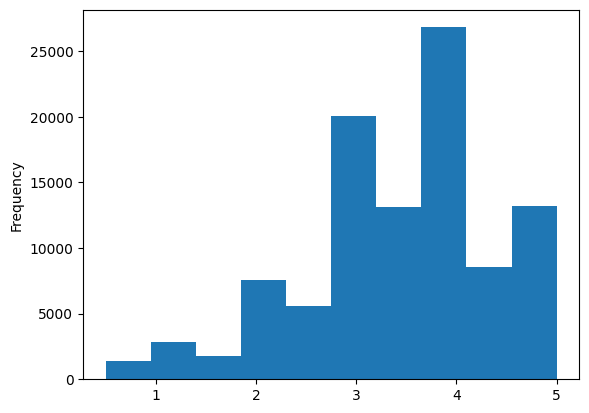

In [10]:
notas.nota.plot(kind='hist')

In [11]:
notas.nota.median()

3.5

In [12]:
print("Média: {}\nMediana: {}".format(notas.nota.mean(), notas.nota.median()))

Média: 3.501556983616962
Mediana: 3.5


In [13]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [14]:
import seaborn as sns

<AxesSubplot:>

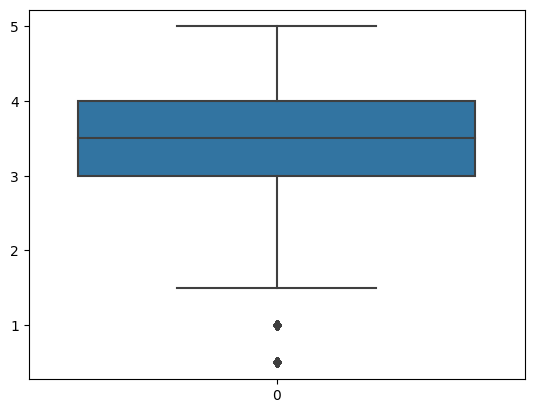

In [15]:
sns.boxplot(notas.nota)

# Olhando os Filmes

In [16]:
filmes = pd.read_csv('data/movies.csv')
filmes.rename(columns={'movieId':'filmeId', 'title':'titulo', 'genres':'generos'}, inplace = True) # outra forma de renomear
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Analisando Notas Específicas por Filme

In [18]:
notas.query("filmeId == 1").nota.mean()

3.9209302325581397

In [19]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [31]:
medias_por_filme = notas.groupby("filmeId").nota.mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

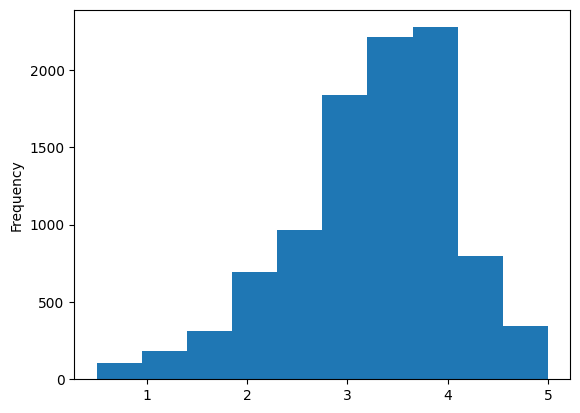

In [33]:
medias_por_filme.plot(kind="hist")

<AxesSubplot:>

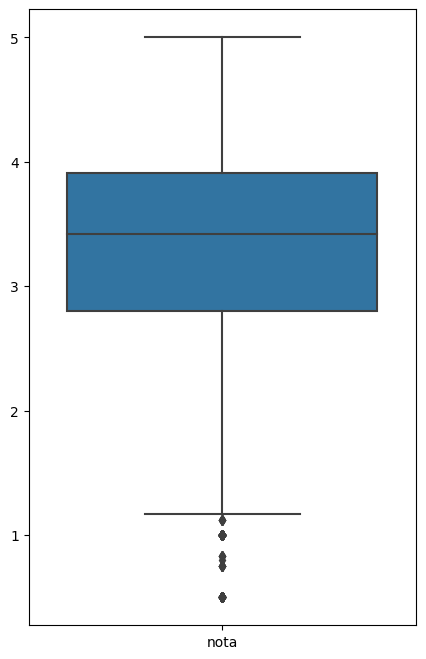

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(pd.DataFrame(medias_por_filme))

In [35]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota', ylabel='Count'>

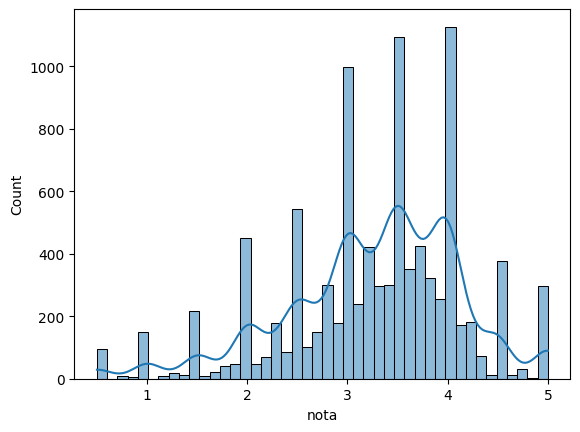

In [46]:
sns.histplot(medias_por_filme, kde=True)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

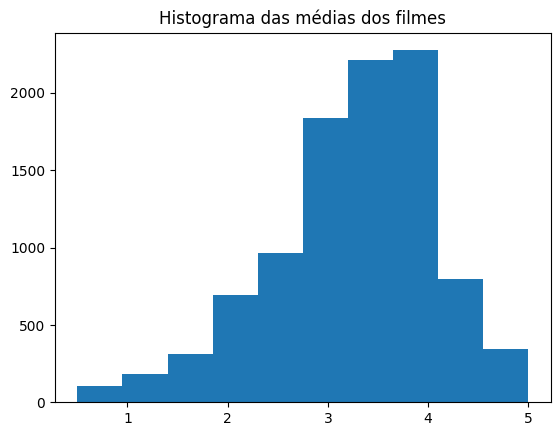

In [44]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")